## Data Analyst Case

#### Carolina Tavares Sancho Monteiro

This case aims to evaluate your Data skills and knowledge for two possible roles:

Data Analyst Business:

• Perform robust exploratory analysis, rich with business insights & data driven proposals to add value to the company and have strong communication skills to influence the decision making

### - Objective

The objective of the team is to build a predictive model that will produce the highest profit for the next direct marketing campaign, scheduled for the next month. The new campaign, sixth, aims at selling a new gadget to the Customer Database. To build the model, a pilot campaign involving 2.240 customers was carried out. The customers were selected at random and contacted by phone regarding the acquisition of the gadget. During the following months, customers who bought the offer were properly labeled. The total cost of the sample campaign was 6.720MU and the revenue generated by the customers who accepted the offer was 3.674MU. 
Globally the campaign had a profit of -3.046MU. The success rate of the campaign was 15%. 

The objective is of the team is to develop a model that predicts customer behavior and to apply it to the rest of the customer base. Hopefully, the model will allow the company to cherry pick the customers that are most likely to purchase the offer while leaving out the non-respondents, making the next campaign highly profitable. Moreover, other than maximizing the profit of the campaign, the CMO is interested in understanding to study the characteristic features of those customers who are willing to buy the gadget.

### - Data Description

- AcceptedCmp1
1: if customer accepted the offer in the 1st campaingn, 0: otherwise
- AcceptedCmp2
1: if customer accepted the offer in the 2nd campaingn, 0: otherwise
- AcceptedCmp3
1: if customer accepted the offer in the 3rd campaingn, 0: otherwise
- AcceptedCmp4
1: if customer accepted the offer in the 4th campaingn, 0: otherwise
- AcceptedCmp5
1: if customer accepted the offer in the 5th campaingn, 0: otherwise
- Response (target)
1: if customer accepted the offer in the last campaingn, 0: otherwise
- Complain
1: if customer has complained in the last 2 years, 0: otherwise
- DtCustomer - Date of customer's enrollment with the company
- Education - Customer level of education
- Marital - Customer's marital status
- Kidhome - Number of small children at customer's household
- Teenhome - Number of teenagers in customer's household
- Income - Customer's yearly household income
- MntFishProducts - Amount spent of fish products in the last 2 years
- MntMeatProducts - Amount spent on meat products in the last 2 years
- MntFruits - Amount spent on fruits on the last 2 years
- MntSweetProducts - Amount spent on sweet products in the last 2 years
- MntWines - Amount spent on wines in the last 2 years
- MntGoldProducts - Amount spent on gold products in the last 2 yers
- NumDealsPurchases - Number of purchases made with discount
- NumCatalogPurchases - Number of purchases made using catalogue
- NumStorePurchases - Number of purchases made directly in stores
- NumWebPurchases - Number of purchases made through company's web site
- NumWebVIsitsMonth - Number of visits to company's web site in the last month
- Recency - Number of days since the last purchase
- Year_Birth - Customer's birth year

### - EDA - Exploratory Data Analysis 


## 1. EDA
Be creative and pay attention to the details. You need to provide the marketing team a better understanding of the characteristic features of respondents

In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from yellowbrick.cluster import KElbowVisualizer

In [3]:
df = pd.read_csv('ifood.csv')
df.head(n=10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.shape

(2240, 29)

In [6]:
pd.DataFrame(df.dtypes, columns=['Type'])

,Type
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


Analysing outliers, NaN's and possible type errors

In [7]:
#there is no duplicates ID
df['ID'].nunique()

2240

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d')
df['Dt_Customer'].dtypes

dtype('<M8[ns]')

In [9]:
df.Income.describe()
#the max income is very far from the 75%quantile, is it an outlier?

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<AxesSubplot:>

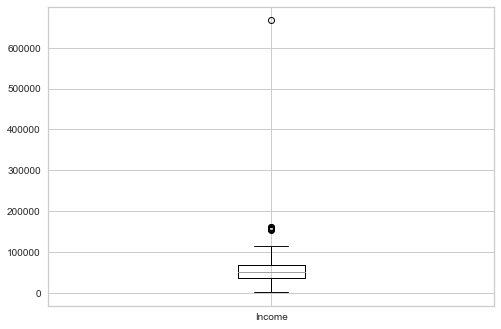

In [10]:
df.boxplot(column='Income')

In [11]:
df.nlargest(10,['Income'])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,3,11,0
1898,4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,...,1,0,0,0,0,0,0,3,11,0
646,4611,1970,Graduation,Together,105471.0,0,0,2013-01-21,36,1009,...,3,0,0,1,1,0,0,3,11,1


In [12]:
#the max probably is a typing error, I'll set it as NaN
df.loc[df['Income']== 666666.000000, 'Income']=np.nan

<AxesSubplot:>

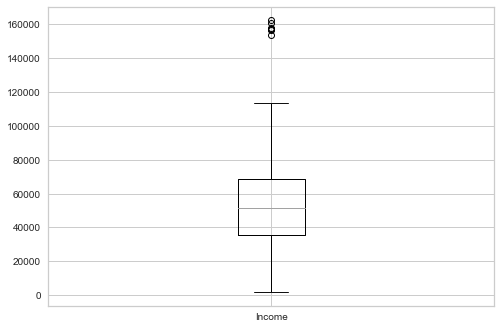

In [13]:
df.boxplot(column='Income')

In [14]:
df.Income.dtype

dtype('float64')

In [145]:
df.Income.describe()

count      2240.00000
mean      51963.20000
std       21405.89641
min        1730.00000
25%       35538.75000
50%       51373.00000
75%       68275.75000
max      162397.00000
Name: Income, dtype: float64

Qualitative Data

In [15]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [16]:
df.Education.value_counts(normalize=True)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

In [17]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [18]:
df.Marital_Status.value_counts(normalize=True)

Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64

In [19]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [20]:
df.loc[df['Marital_Status']=='Alone', 'Marital_Status']= 'Single'
df.loc[df['Marital_Status']=='Absurd', 'Marital_Status']= 'Single'
df.loc[df['Marital_Status']=='YOLO', 'Marital_Status']= 'Single'

In [21]:
df.Marital_Status.value_counts(normalize=True)

Married     0.385714
Together    0.258929
Single      0.217411
Divorced    0.103571
Widow       0.034375
Name: Marital_Status, dtype: float64

In [22]:
#looking for NAN's
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 25
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [23]:
#Income has 24 nan values + the outlier I set as NaN. I'll set the median to the NaN so I dont change the distribution
df['Income'] = df['Income'].fillna(df['Income'].median())

In [24]:
df.Income.describe()

count      2240.00000
mean      51963.20000
std       21405.89641
min        1730.00000
25%       35538.75000
50%       51373.00000
75%       68275.75000
max      162397.00000
Name: Income, dtype: float64

In [25]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Adding new columns to make the analysis: 
- Age;
- Sum of amounts;
- Acceptance Score: sum of accepted campaing;
- Regular Products: Sum of amounts - amount gold products;
- Sum of purchases: sum of Web + Catalog + Store purchases

#### Calculating the Age and adding a new column:

I'll use the last Dt_Customer as the last date when the campaing was done - so the difference between the max Dt_customer and the birth year will be the age the person has at that moment

In [26]:
df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [27]:
df['Age'] = df.Dt_Customer.max().year - df['Year_Birth']
df.Age

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Age, Length: 2240, dtype: int64

In [28]:
df.Age.describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

<AxesSubplot:>

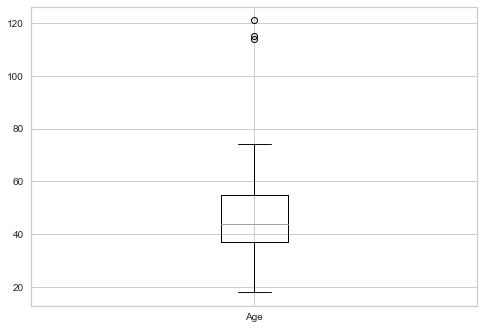

In [29]:
df.boxplot(column='Age')

In [30]:
df.nlargest(5,['Age'])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,3,11,0,121
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,1,0,0,0,3,11,0,115
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,0,1,3,11,0,114
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,0,0,0,0,0,0,3,11,0,74
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,0,0,1,0,0,0,3,11,0,73


Age 114, 115 and 121?? Probably people with that age wouldn't answer phone calls and these are outliers. I'll change these data for the median 

In [31]:
agemax = [121,115,114]

In [32]:
for i in range (3):
    df.loc[df['Age']== agemax[i], 'Age']= df.Age.median()

In [33]:
df.nlargest(5,['Age'])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,0,0,0,0,0,0,3,11,0,74
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,0,0,1,0,0,0,3,11,0,73
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,1,0,0,0,0,0,3,11,1,71
358,6142,1943,Master,Married,65073.0,0,0,2013-08-20,65,629,...,0,0,0,0,0,1,3,11,0,71
415,7106,1943,PhD,Married,75865.0,0,0,2014-03-31,73,483,...,0,0,0,0,0,0,3,11,0,71


<AxesSubplot:>

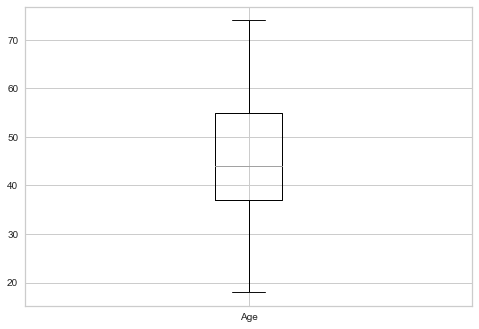

In [34]:
df.boxplot(column='Age')

In [35]:
df.Age.describe()

count    2240.000000
mean       45.096875
std        11.694144
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max        74.000000
Name: Age, dtype: float64

#### Sum of amounts

In [36]:
df['TotalMnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts']

#### Acceptance Score - How many times did that person accepted a campaing?
- 0: no one;
- 1: at least 1 campaing;
- 2: 2 campaings...

In [37]:
df['Accept_Score']=df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [38]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalMnt,Accept_Score
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,57,1529,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,60,21,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,49,734,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,30,48,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,33,407,0


In [39]:
df['Accept_Score'].value_counts(normalize=True)

0    0.793304
1    0.145089
2    0.037054
3    0.019643
4    0.004911
Name: Accept_Score, dtype: float64

#### Regular Products: Sum of amounts - amount gold products.

In [40]:
df['Regular_Products'] = df['TotalMnt'] - df['MntGoldProds']

In [41]:
df['Sum_Purchases'] = df.apply(lambda row: row.NumWebPurchases + row.NumCatalogPurchases + row.NumStorePurchases, axis=1)

In [42]:
df[['Age', 'TotalMnt', 'Accept_Score', 'Regular_Products', 'Sum_Purchases' ]]

,Age,TotalMnt,Accept_Score,Regular_Products,Sum_Purchases
0,57,1529,0,1441,22
1,60,21,0,15,4
2,49,734,0,692,20
3,30,48,0,43,6
4,33,407,0,392,14
...,...,...,...,...,...
2235,47,1094,0,847,16
2236,68,436,1,428,15
2237,33,1217,1,1193,18
2238,58,782,0,721,21


### Checking if the other columns have only 1/2/0 as parameters:


In [43]:
df.Kidhome.unique()

array([0, 1, 2], dtype=int64)

In [44]:
df.Teenhome.unique()

array([0, 1, 2], dtype=int64)

In [45]:
df.AcceptedCmp1.unique()

array([0, 1], dtype=int64)

In [46]:
df.AcceptedCmp2.unique()

array([0, 1], dtype=int64)

In [47]:
df.AcceptedCmp3.unique()

array([0, 1], dtype=int64)

In [48]:
df.AcceptedCmp4.unique()

array([0, 1], dtype=int64)

In [49]:
df.AcceptedCmp5.unique()

array([0, 1], dtype=int64)

In [50]:
df.Response.unique()

array([1, 0], dtype=int64)

In [51]:
df.Complain.unique()

array([0, 1], dtype=int64)

In [52]:
df.to_csv('dfifood.csv',sep=';')

### Sociodemographic Visualization

In [53]:
def plot_percentage(var, data):
    plt.figure(figsize=(6, 5))
    
    ax = sns.countplot(x=var, data=data, orient='h', palette='Set2', order=data[var].value_counts().index)
    ax.set_ylabel('Count', fontsize=10)
    ax.set_title(var, fontsize=15)
    sizes = []
    
    for p in ax.patches:
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x() + p.get_width()/1.6, 
                height + 6,
               '{:1.2f}%'.format(height/len(data)*100),
               ha = 'center', va = 'bottom',
               fontsize=9)

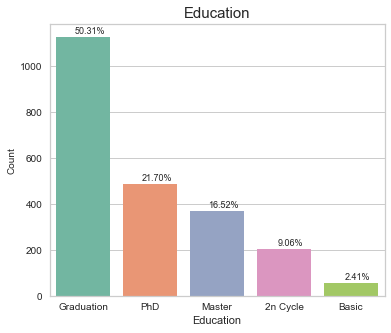

In [54]:
plot_percentage('Education', df)

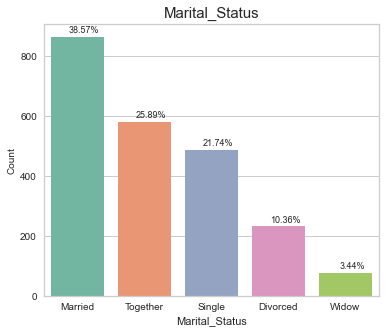

In [55]:
plot_percentage('Marital_Status', df)

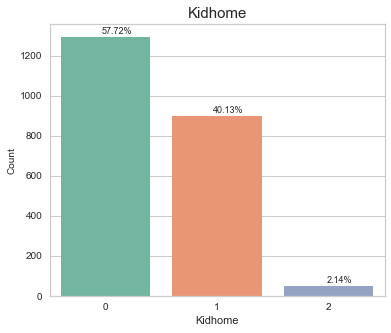

In [56]:
plot_percentage('Kidhome', df)

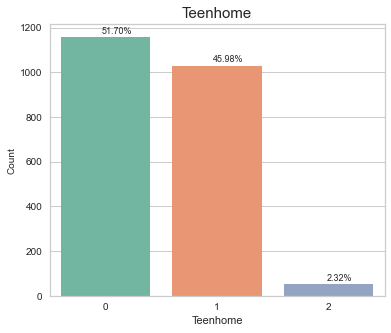

In [57]:
plot_percentage('Teenhome', df)

In [58]:
dfage = pd.DataFrame(df['Age'], columns =['Age'])
dfage['Age']=pd.cut(dfage['Age'], bins=4, precision=0)
dfage[['Age']].value_counts()

Age         
(32.0, 46.0]    943
(46.0, 60.0]    685
(18.0, 32.0]    346
(60.0, 74.0]    266
dtype: int64

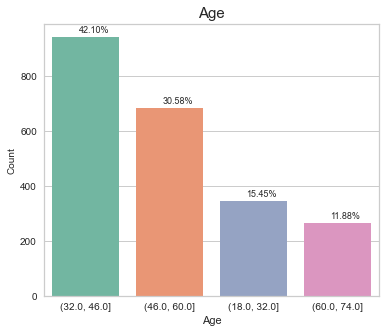

In [59]:
plot_percentage('Age', dfage)

### Marketing Campaings Visualization

In [60]:
acceptedcamp = [df['AcceptedCmp1'].sum(), df['AcceptedCmp2'].sum(), df['AcceptedCmp3'].sum(),df['AcceptedCmp4'].sum(), df['AcceptedCmp5'].sum().sum()]
acceptedcamp

[144, 30, 163, 167, 163]

In [61]:
percaccep = acceptedcamp/df.AcceptedCmp1.count() *100
percaccep

array([6.42857143, 1.33928571, 7.27678571, 7.45535714, 7.27678571])

In [62]:
campaings = ['Campaing1','Campaing2','Campaing3','Campaing4','Campaing5']

<AxesSubplot:title={'center':'Campaings - % Acceptance'}, xlabel='Campaign', ylabel='% Acceptance'>

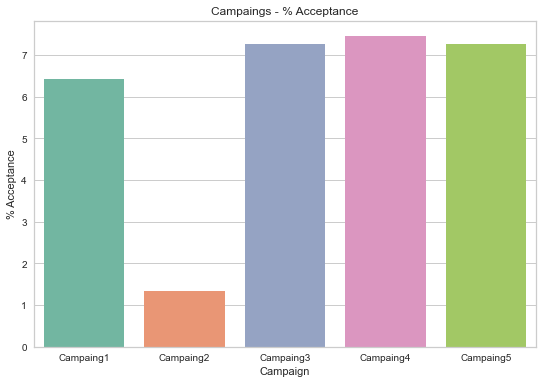

In [63]:
plt.figure(figsize = (9,6))
plt.xlabel('Campaign')
plt.ylabel('% Acceptance')
plt.title('Campaings - % Acceptance')
sns.barplot(x=campaings, y=percaccep, palette="Set2")

In [64]:
df.Accept_Score.value_counts(normalize=True)

0    0.793304
1    0.145089
2    0.037054
3    0.019643
4    0.004911
Name: Accept_Score, dtype: float64

<AxesSubplot:xlabel='Accept_Score', ylabel='count'>

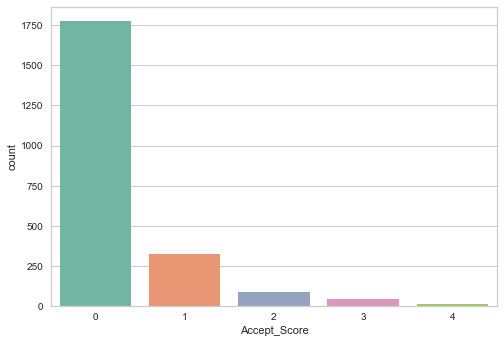

In [65]:
sns.countplot(data=df, x='Accept_Score',palette="Set2")

### Client profile in each Campaing:

In [66]:
dfa1 = df[df['AcceptedCmp1']== 1]
dfa2 = df[df['AcceptedCmp2']== 1]
dfa3 = df[df['AcceptedCmp3']== 1]
dfa4 = df[df['AcceptedCmp4']== 1]
dfa5 = df[df['AcceptedCmp5']== 1]

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

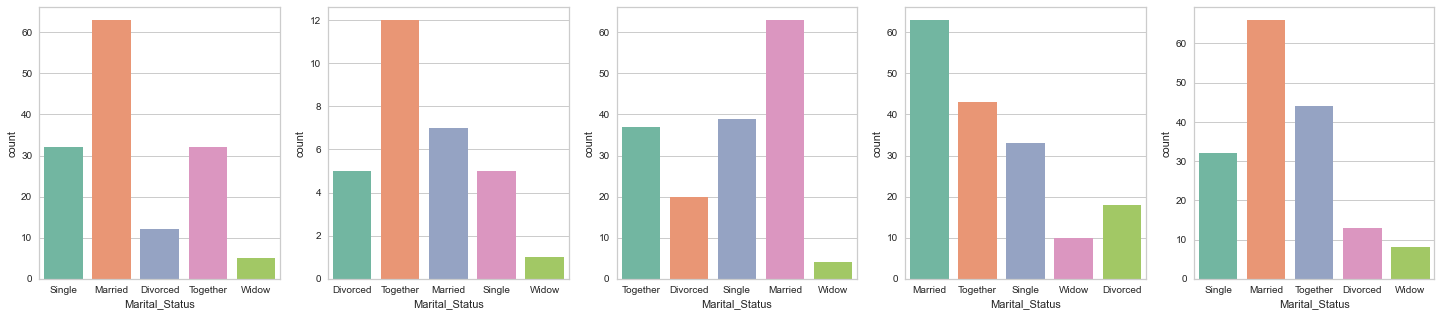

In [67]:
fig, ax = plt.subplots(1,5, figsize=(25,5))

sns.countplot(x="Marital_Status", data=dfa1, ax=ax[0],palette="Set2" )
sns.countplot(x="Marital_Status", data=dfa2, ax=ax[1],palette="Set2")
sns.countplot(x="Marital_Status", data=dfa3, ax=ax[2],palette="Set2")
sns.countplot(x="Marital_Status", data=dfa4, ax=ax[3],palette="Set2")
sns.countplot(x="Marital_Status", data=dfa5, ax=ax[4],palette="Set2")

##### People married or together tend to accept more the campaings

<AxesSubplot:xlabel='Education', ylabel='count'>

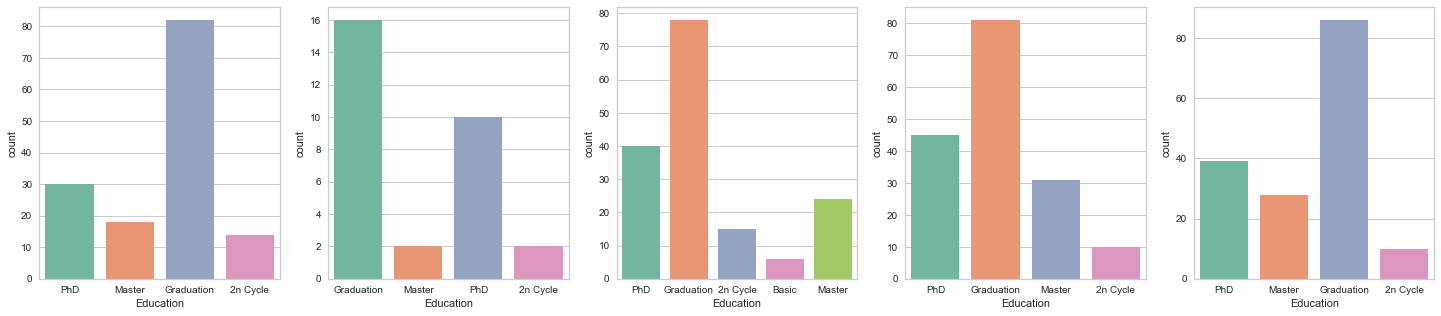

In [68]:
fig, ax = plt.subplots(1,5, figsize=(25,5))

sns.countplot(x="Education", data=dfa1, ax=ax[0],palette="Set2" )
sns.countplot(x="Education", data=dfa2, ax=ax[1],palette="Set2")
sns.countplot(x="Education", data=dfa3, ax=ax[2],palette="Set2")
sns.countplot(x="Education", data=dfa4, ax=ax[3],palette="Set2")
sns.countplot(x="Education", data=dfa5, ax=ax[4],palette="Set2")

##### People with Graduation as Education Level accepted more all the Campaings than the other education levels

In [69]:
dfage1 = pd.DataFrame(dfa1['Age'], columns =['Age'])
dfage1['Age']=pd.cut(dfage1['Age'], bins=4, precision=0)
dfage1[['Age']].value_counts(normalize=True, ascending=False)

Age         
(32.0, 45.0]    0.319444
(45.0, 58.0]    0.236111
(58.0, 70.0]    0.236111
(20.0, 32.0]    0.208333
dtype: float64

In [70]:
dfage2 = pd.DataFrame(dfa2['Age'], columns =['Age'])
dfage2['Age']=pd.cut(dfage2['Age'], bins=4, precision=0)
dfage2[['Age']].value_counts(normalize=True, ascending=False)

Age         
(52.0, 62.0]    0.400000
(41.0, 52.0]    0.333333
(30.0, 41.0]    0.166667
(20.0, 30.0]    0.100000
dtype: float64

In [71]:
dfage3 = pd.DataFrame(dfa3['Age'], columns =['Age'])
dfage3['Age']=pd.cut(dfage3['Age'], bins=4, precision=0)
dfage3[['Age']].value_counts(normalize=True, ascending=False)

Age         
(31.0, 44.0]    0.435583
(44.0, 58.0]    0.208589
(18.0, 31.0]    0.196319
(58.0, 71.0]    0.159509
dtype: float64

In [72]:
dfage4 = pd.DataFrame(dfa4['Age'], columns =['Age'])
dfage4['Age']=pd.cut(dfage4['Age'], bins=4, precision=0)
dfage4[['Age']].value_counts(normalize=True, ascending=False)

Age         
(32.0, 45.0]    0.329341
(45.0, 58.0]    0.323353
(58.0, 70.0]    0.227545
(20.0, 32.0]    0.119760
dtype: float64

In [73]:
dfage5 = pd.DataFrame(dfa5['Age'], columns =['Age'])
dfage5['Age']=pd.cut(dfage5['Age'], bins=4, precision=0)
dfage5[['Age']].value_counts(normalize=True, ascending=False)

Age         
(32.0, 46.0]    0.325153
(19.0, 32.0]    0.263804
(46.0, 60.0]    0.220859
(60.0, 73.0]    0.190184
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='count'>

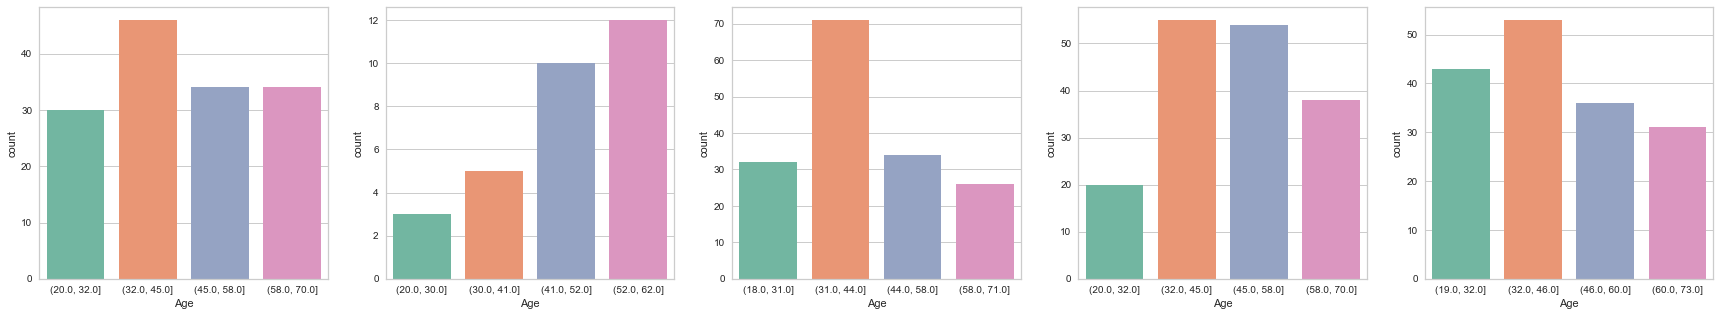

In [74]:
fig, ax = plt.subplots(1,5, figsize=(30,5))

sns.countplot(x="Age", data=dfage1, ax=ax[0],palette="Set2" )
sns.countplot(x="Age", data=dfage2, ax=ax[1],palette="Set2")
sns.countplot(x="Age", data=dfage3, ax=ax[2],palette="Set2")
sns.countplot(x="Age", data=dfage4, ax=ax[3],palette="Set2")
sns.countplot(x="Age", data=dfage5, ax=ax[4],palette="Set2")

#### Except in the number 2 Campaing (the one with less acceptance), all the other ones have more acceptance with people between 30 and 45 years

<AxesSubplot:ylabel='Income'>

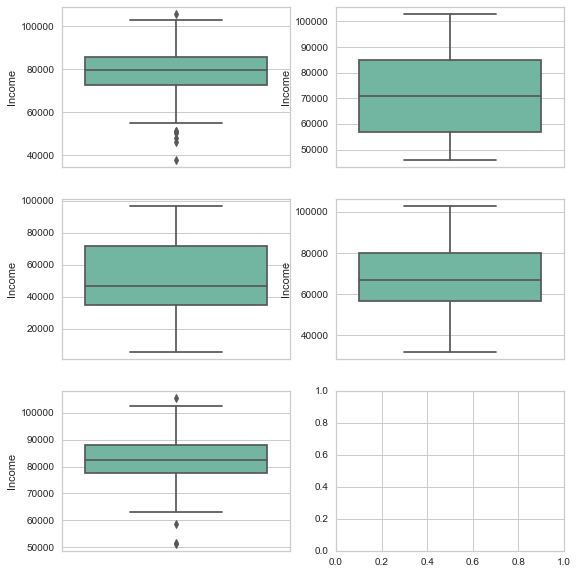

In [75]:
fig, ax = plt.subplots(3,2, figsize=(9,10))

sns.boxplot(y='Income', data=dfa1, ax=ax[0][0],palette="Set2" )
sns.boxplot(y='Income', data=dfa2, ax=ax[0][1],palette="Set2")
sns.boxplot(y='Income', data=dfa3, ax=ax[1][0],palette="Set2")
sns.boxplot(y='Income', data=dfa4, ax=ax[1][1],palette="Set2")
sns.boxplot(y='Income', data=dfa5, ax=ax[2][0],palette="Set2")

In [76]:
m1 = dfa1.Income.mean()
m2 = dfa2.Income.mean()
m3 = dfa3.Income.mean()
m4 = dfa4.Income.mean()
m5 = dfa5.Income.mean()
listmean = [m1, m2, m3, m4, m5]

In [77]:
medias = ['Camp1', 'Camp2', 'Camp3', 'Camp4', 'Camp5']

<AxesSubplot:title={'center':'Mean Income - Campaings'}, xlabel='Campaing', ylabel='Mean Income'>

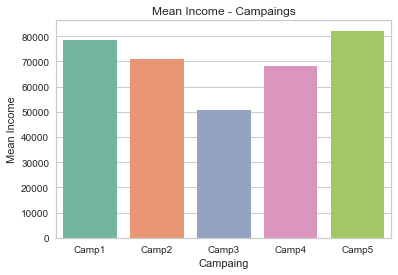

In [78]:
plt.figure(figsize = (6,4))
plt.xlabel('Campaing')
plt.ylabel('Mean Income')
plt.title('Mean Income - Campaings')
sns.barplot(x=medias, y=listmean, palette="Set2")

In [79]:
products = [df['MntGoldProds'].sum(), df['Regular_Products'].sum()]

In [80]:
prod = ['Gold_Products', 'Regular_Products']

In [81]:
productsperc = products/(df['MntGoldProds'].sum()+df['Regular_Products'].sum()) *100
productsperc

array([ 7.83619243, 92.16380757])

<AxesSubplot:title={'center':'Products Regular and Gold - % Amount'}, xlabel='Products', ylabel='% Amount'>

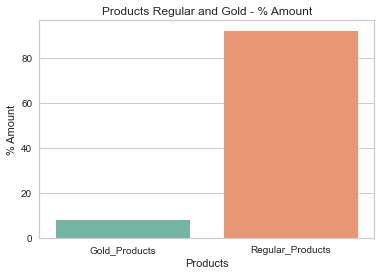

In [82]:
plt.figure(figsize = (6,4))
plt.xlabel('Products')
plt.ylabel('% Amount')
plt.title('Products Regular and Gold - % Amount')
sns.barplot(x=prod, y=productsperc, palette="Set2")

##### In the last 2 years, people bought more  Regular Products than Gold Products
Which products sell more? And which has the bigger amount?

In [83]:
amountprod = [df['MntWines'].sum(), df['MntFruits'].sum(), df['MntMeatProducts'].sum(),df['MntFishProducts'].sum(), df['MntSweetProducts'].sum()]

In [84]:
listprod = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet']

In [85]:
totalamount = df.TotalMnt.sum()

In [86]:
amountprodperc = amountprod/totalamount * 100
amountprodperc

array([54.10261932,  4.68197578, 29.71823274,  6.67978407,  4.81738808])

<AxesSubplot:title={'center':'Products % Amount'}, xlabel='Products', ylabel='% Amount'>

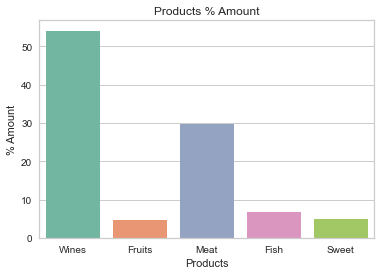

In [87]:
plt.figure(figsize = (6,4))
plt.xlabel('Products')
plt.ylabel('% Amount')
plt.title('Products % Amount')
sns.barplot(x=listprod, y=amountprodperc, palette="Set2")

In [88]:
df['MntWines'].sum() / totalamount * 100 + df['MntMeatProducts'].sum() / totalamount * 100

83.82085206444162

##### Wines represent more than 50% of the total amount, Meat is in second place with 29.7%. Together they're responsible for 83,8% of the amount.

#### People bought more from wich sales channel?

In [89]:
saleschan = [df['NumWebPurchases'].sum(), df['NumCatalogPurchases'].sum(), df['NumStorePurchases'].sum()]
saleschan

[9150, 5963, 12970]

In [90]:
totalchan = df['NumWebPurchases'].sum() + df['NumCatalogPurchases'].sum() + df['NumStorePurchases'].sum()

In [91]:
sales = ['Web_Purchases', 'Catalog_Purchases', 'Store_Purchases']

In [92]:
saleschanper = saleschan/totalchan* 100
saleschanper

array([32.5819891 , 21.23348645, 46.18452445])

<AxesSubplot:title={'center':'Sales Channel % Purchases'}, xlabel='% Purchases', ylabel='Sales Channel'>

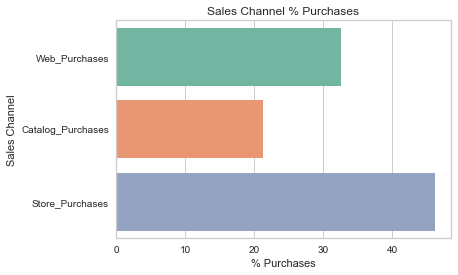

In [93]:
plt.figure(figsize = (6,4))
plt.xlabel('% Purchases')
plt.ylabel('Sales Channel')
plt.title('Sales Channel % Purchases')
sns.barplot(x=saleschanper, y=sales, palette="Set2")

##### People use to purchase more at the Store (46.2%)

## 2. Customer Segmentation
Create and describe a customer segmentation based on customers behaviors

In [94]:
#turning all the columns to numerical:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [95]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [96]:
df['Marital_Number'] = df['Marital_Status']
maritaldict = {'Single':'0', 'Together' :'1',  'Married':'2', 'Divorced':'3', 'Widow':'4'}
df['Marital_Number'] = df['Marital_Number'].replace(maritaldict)

In [97]:
df.Marital_Number.unique()

array(['0', '1', '2', '3', '4'], dtype=object)

In [98]:
df['Education_Number'] = df['Education']
educationdict = {'Basic':'0', '2n Cycle' :'1',  'Graduation':'2', 'Master':'3', 'PhD':'4'}
df['Education_Number'] = df['Education_Number'].replace(educationdict)

In [99]:
df.Education_Number.unique()

array(['2', '4', '3', '0', '1'], dtype=object)

In [100]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'TotalMnt', 'Accept_Score', 'Regular_Products', 'Sum_Purchases',
       'Marital_Number', 'Education_Number'],
      dtype='object')

In [116]:
#all the columns except ID, Year_Birth, Z_ConstContact, Z_reveneue
dfcs = df[['ID', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response',
       'Age', 'TotalMnt', 'Accept_Score', 'Sum_Purchases',
       'Marital_Number', 'Education_Number']]

### Elbow Method

In [117]:
pd.DataFrame(dfcs.dtypes, columns=['Type'])

,Type
ID,int64
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,datetime64[ns]
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64


In [118]:
dfcs = dfcs.reset_index(drop=True)

In [119]:
dfcs['Dt_Customer'] = pd.DatetimeIndex(dfcs['Dt_Customer']).year


In [120]:
dfcs[['Marital_Number','Education_Number']] = df[['Marital_Number','Education_Number']].astype(float)

In [121]:
#all the columns except ID
k_rng = range(2,11)
sse =[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dfcs[['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'TotalMnt',
       'Accept_Score', 'Sum_Purchases', 'Marital_Number', 'Education_Number']])
    sse.append(km.inertia_)

In [122]:
sse

[326561694151.29395,
 183508830613.07184,
 124439722370.05838,
 83143604219.79578,
 53777981239.401596,
 41146674323.74694,
 31288377826.990887,
 24361617991.020515,
 19263277629.66693]

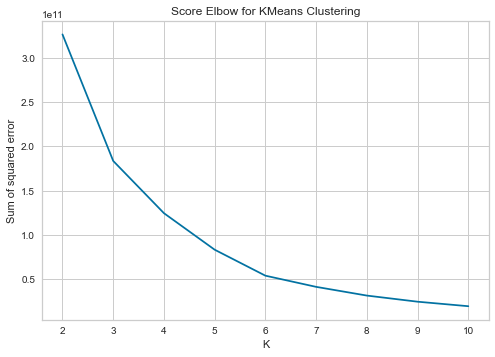

In [123]:
plt.title('Score Elbow for KMeans Clustering')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

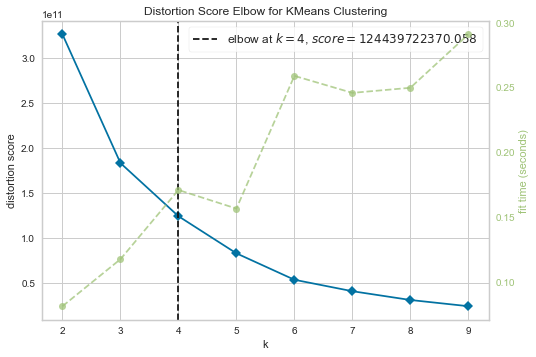

In [124]:
plt_elb = KElbowVisualizer(KMeans(random_state=42), k=(2,10), metric='distortion')
plt_elb.fit(dfcs[['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'TotalMnt',
       'Accept_Score', 'Sum_Purchases', 'Marital_Number', 'Education_Number']])
plt_elb.show();

In [125]:
#lets make with 4 clusters:

kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [126]:
y_predicted = kmeans.fit_predict(dfcs[['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'TotalMnt',
       'Accept_Score', 'Sum_Purchases', 'Marital_Number', 'Education_Number']])
y_predicted

array([0, 2, 0, ..., 0, 0, 2])

In [127]:
dfcs['cluster']= y_predicted
dfcs.head()

,ID,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Response,Age,TotalMnt,Accept_Score,Sum_Purchases,Marital_Number,Education_Number,cluster
0,5524,58138.0,0,0,2012,58,635,88,546,172,...,0,0,1,57,1529,0,22,0.0,2.0,0
1,2174,46344.0,1,1,2014,38,11,1,6,2,...,0,0,0,60,21,0,4,0.0,2.0,2
2,4141,71613.0,0,0,2013,26,426,49,127,111,...,0,0,0,49,734,0,20,1.0,2.0,0
3,6182,26646.0,1,0,2014,26,11,4,20,10,...,0,0,0,30,48,0,6,1.0,2.0,1
4,5324,58293.0,1,0,2014,94,173,43,118,46,...,0,0,0,33,407,0,14,2.0,4.0,0


In [128]:
dfcs.cluster.value_counts()

2    691
0    654
1    500
3    395
Name: cluster, dtype: int64

In [129]:
dfcs.cluster.value_counts(normalize=True, ascending=False)

2    0.308482
0    0.291964
1    0.223214
3    0.176339
Name: cluster, dtype: float64

<AxesSubplot:xlabel='cluster', ylabel='count'>

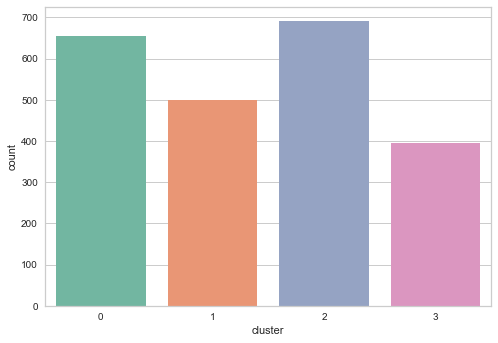

In [130]:
sns.countplot(x='cluster', data=dfcs, palette='Set2')

<AxesSubplot:xlabel='Accept_Score', ylabel='count'>

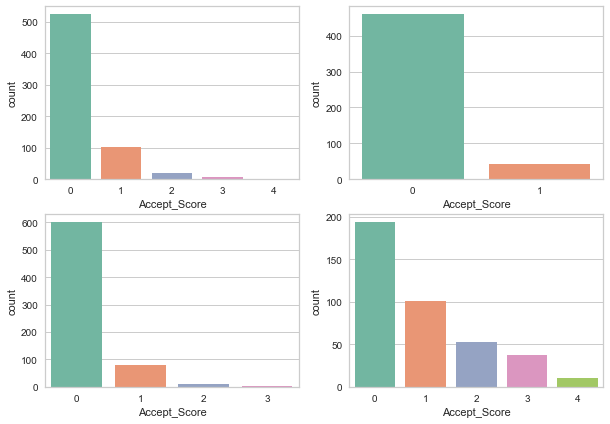

In [131]:
dfc0 = dfcs[dfcs['cluster']==0]
dfc1 = dfcs[dfcs['cluster']==1]
dfc2 = dfcs[dfcs['cluster']==2]
dfc3 = dfcs[dfcs['cluster']==3]


fig, ax = plt.subplots(2,2, figsize=(10,7))

sns.countplot(x="Accept_Score", data=dfc0, ax=ax[0][0],palette="Set2" )
sns.countplot(x="Accept_Score", data=dfc1, ax=ax[0][1],palette="Set2")
sns.countplot(x="Accept_Score", data=dfc2, ax=ax[1][0],palette="Set2")
sns.countplot(x="Accept_Score", data=dfc3, ax=ax[1][1],palette="Set2")

<AxesSubplot:xlabel='cluster', ylabel='count'>

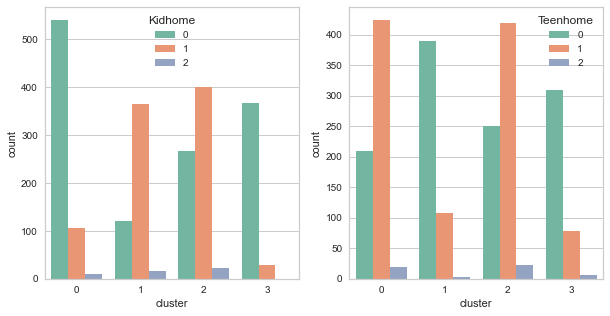

In [132]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x="cluster", hue="Kidhome", data=dfcs, ax=ax[0], palette='Set2')
sns.countplot(x="cluster", hue="Teenhome", data=dfcs, ax=ax[1], palette='Set2')

<AxesSubplot:title={'center':'Age'}, xlabel='cluster'>

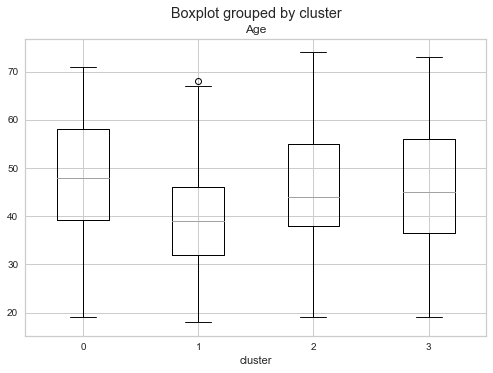

In [133]:
dfcs.boxplot(column = 'Age', by='cluster')

<AxesSubplot:title={'center':'Income'}, xlabel='cluster'>

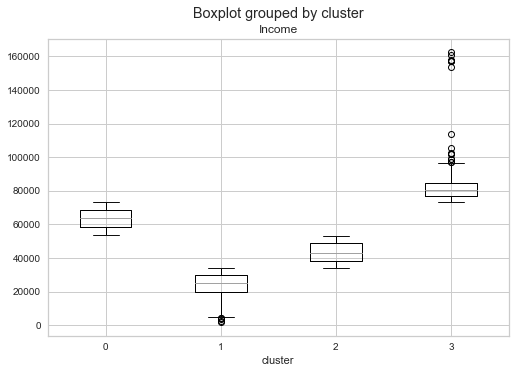

In [134]:
dfcs.boxplot(column = 'Income', by='cluster')

<AxesSubplot:title={'center':'TotalMnt'}, xlabel='cluster'>

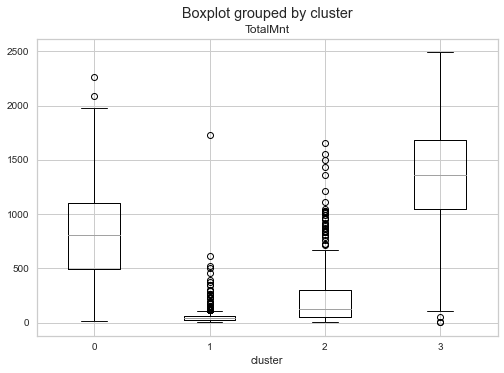

In [135]:
dfcs.boxplot(column = 'TotalMnt', by='cluster')

<AxesSubplot:title={'center':'MntWines'}, xlabel='cluster'>

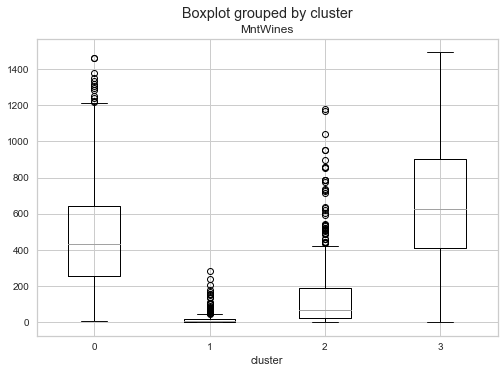

In [136]:
dfcs.boxplot(column = 'MntWines', by='cluster')

<AxesSubplot:title={'center':'Recency'}, xlabel='cluster'>

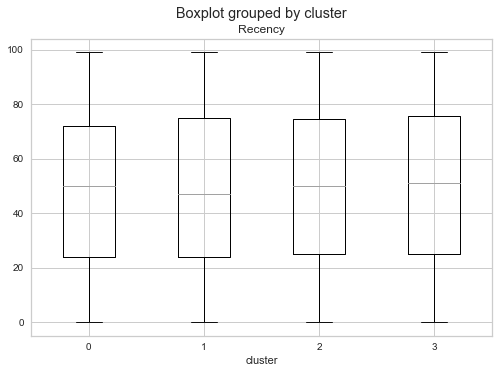

In [137]:
dfcs.boxplot(column = 'Recency', by='cluster')

In [138]:
dfcs.to_csv('dfcsifood.csv',sep=';')

In [139]:
dfcs.head()

,ID,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Response,Age,TotalMnt,Accept_Score,Sum_Purchases,Marital_Number,Education_Number,cluster
0,5524,58138.0,0,0,2012,58,635,88,546,172,...,0,0,1,57,1529,0,22,0.0,2.0,0
1,2174,46344.0,1,1,2014,38,11,1,6,2,...,0,0,0,60,21,0,4,0.0,2.0,2
2,4141,71613.0,0,0,2013,26,426,49,127,111,...,0,0,0,49,734,0,20,1.0,2.0,0
3,6182,26646.0,1,0,2014,26,11,4,20,10,...,0,0,0,30,48,0,6,1.0,2.0,1
4,5324,58293.0,1,0,2014,94,173,43,118,46,...,0,0,0,33,407,0,14,2.0,4.0,0


In [140]:
dflr = dfcs.drop(['ID','cluster', 'Dt_Customer'], axis=1)

In [141]:
dflr.corr()['Response'].sort_values(ascending=False)

Response               1.000000
Accept_Score           0.426035
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
TotalMnt               0.264440
AcceptedCmp3           0.254258
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
AcceptedCmp4           0.177019
AcceptedCmp2           0.169293
Sum_Purchases          0.164688
Income                 0.160786
NumWebPurchases        0.148730
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
Education_Number       0.098945
NumStorePurchases      0.039363
NumDealsPurchases      0.002238
Complain              -0.001707
NumWebVisitsMonth     -0.003987
Age                   -0.018369
Marital_Number        -0.021344
Kidhome               -0.080008
Teenhome              -0.154446
Recency               -0.198437
Name: Response, dtype: float64

Text(0.5, 1.0, 'Features Correlating with Response')

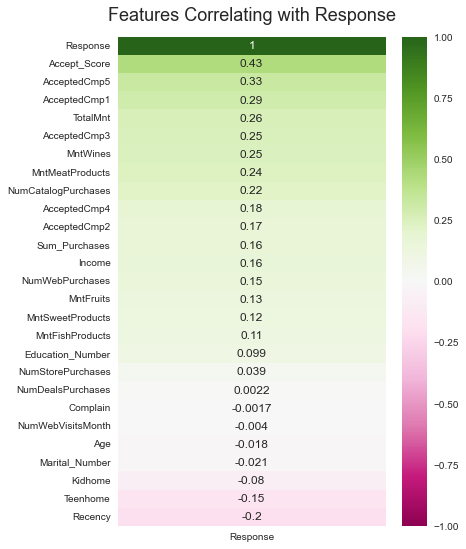

In [142]:
plt.figure(figsize=(6, 9))
heatmap = sns.heatmap(dflr.corr()[['Response']].sort_values(by='Response', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('Features Correlating with Response', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

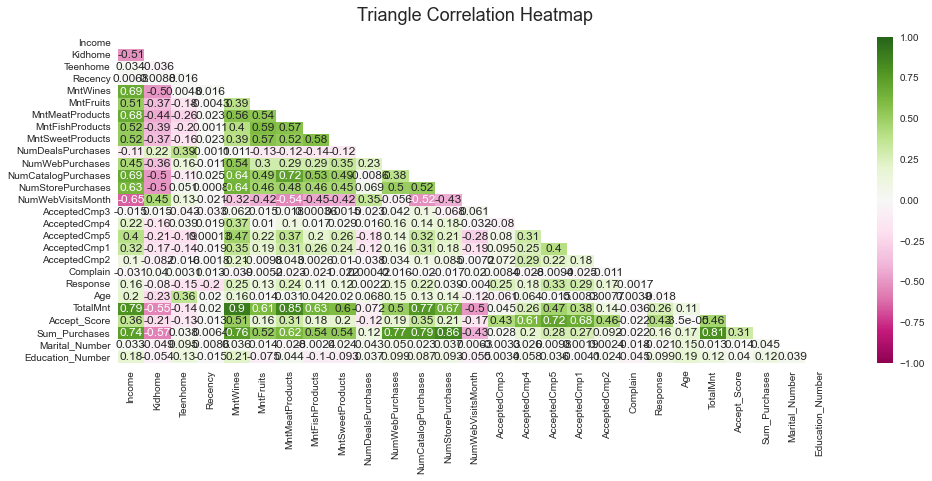

In [143]:
np.triu(np.ones_like(dflr.corr()))
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(dflr.corr(), dtype=bool))
heatmap = sns.heatmap(dflr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

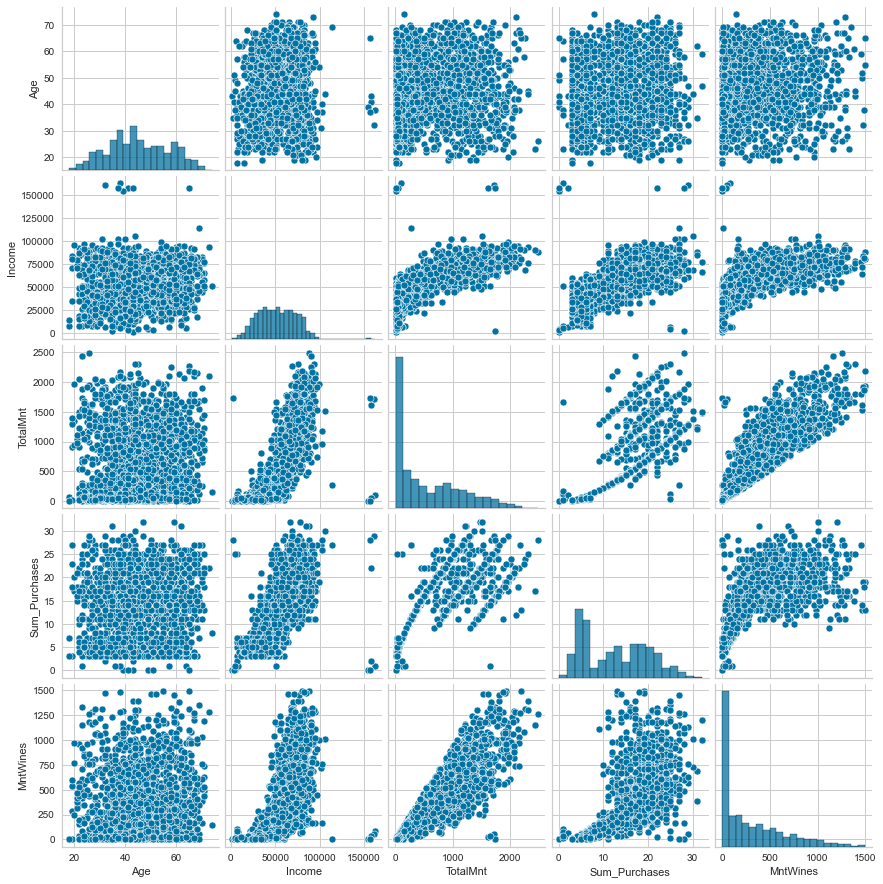

In [144]:
sns.pairplot(dflr[['Age','Income','TotalMnt','Sum_Purchases', 'MntWines']], palette = 'Set2')

## 3. Predictive model (classification)  - another Notebook because of the Pycaret library.

# Tableau Dashboards:

https://public.tableau.com/app/profile/carolina.tavares.sancho.monteiro/viz/Case_DA/Case_IFOOD